In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv(r'data1.csv')
df.head

<bound method NDFrame.head of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   Wh

In [ ]:
#We start with data preprocessing
df.drop(columns=['education','native-country'],inplace=True)

In [ ]:
df['occupation'].mask(df['occupation']==' Handlers-cleaners',"House services",inplace=True)
df['occupation'].mask(df['occupation']==' Priv-house-serv',"House services",inplace=True)
df['occupation'].mask(df['occupation']==' Adm-clerical',"Technical job",inplace=True)
df['occupation'].mask(df['occupation']==' Tech-support',"Technical job",inplace=True)
df['occupation'].mask(df['occupation']==' Machine-op-inspct',"Technical job",inplace=True)
df['occupation'].mask(df['occupation']==' Protective-serv',"Armed and protective services",inplace=True)
df['occupation'].mask(df['occupation']==' Armed-Forces',"Armed and protective services",inplace=True)
df['occupation'].mask(df['occupation']==' Prof-specialty',"Administrative and prof speciality",inplace=True)
df['occupation'].mask(df['occupation']==' Exec-managerial',"Administrative and prof speciality",inplace=True)
df['occupation'].mask(df['occupation']==' Transport-moving',"other", inplace=True)
df['occupation'].mask(df['occupation']==' ?',"other", inplace=True)
df['occupation'].mask(df['occupation']==' Sales',"other", inplace=True)
df['occupation'].mask(df['occupation']==' Farming-fishing',"other", inplace=True)
df['occupation'].mask(df['occupation']==' Other-service',"other", inplace=True)
df['occupation'].mask(df['occupation']==' Craft-repair',"other", inplace=True)

In [ ]:
df. rename(columns = {'target':'Salary'}, inplace = True)
df['workclass'].mask(df['workclass']==' ?',"other", inplace=True)

In [ ]:
class_le = LabelEncoder()
df['Salary']=class_le.fit_transform(df['Salary'].values)
df['sex']=class_le.fit_transform(df['sex'].values)
df=pd.get_dummies(df, columns=['workclass','marital-status','occupation','relationship','race'])

In [ ]:
#now we define the X variables and the output varible
X=df.drop('Salary',axis=1)
y=df['Salary']

In [ ]:
#we do oversamplig as the number of values in the output varibale for the salaries bigger than 50k are almost 1/3 of the
#zero variable
smk=SMOTETomek(random_state=42)
X,y=smk.fit_resample(X,y)
y.value_counts()

0    22213
1    22213
Name: Salary, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)

In [ ]:
from pandas import DataFrame
X=DataFrame(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout 
tf.random.set_seed(123)

model = Sequential() 
model.add(Dense(512, activation='relu', input_dim=39))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 512)               20480     
                                                                 
 dense_219 (Dense)           (None, 512)               262656    
                                                                 
 dropout_168 (Dropout)       (None, 512)               0         
                                                                 
 dense_220 (Dense)           (None, 256)               131328    
                                                                 
 dropout_169 (Dropout)       (None, 256)               0         
                                                                 
 dense_221 (Dense)           (None, 128)               32896     
                                                                 
 dropout_170 (Dropout)       (None, 128)             

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=100,shuffle=True,callbacks=callback)

Epoch 1/10
249/249 [==============================] - 7s 26ms/step - loss: 0.2995 - accuracy: 0.8752 - val_loss: 0.2687 - val_accuracy: 0.8943
Epoch 2/10
249/249 [==============================] - 4s 17ms/step - loss: 0.2876 - accuracy: 0.8852 - val_loss: 0.2413 - val_accuracy: 0.8935
Epoch 3/10
249/249 [==============================] - 4s 15ms/step - loss: 0.2955 - accuracy: 0.8797 - val_loss: 0.2651 - val_accuracy: 0.8943
Epoch 4/10
249/249 [==============================] - 4s 15ms/step - loss: 0.2852 - accuracy: 0.8797 - val_loss: 0.2512 - val_accuracy: 0.8966
Epoch 5/10
249/249 [==============================] - 4s 15ms/step - loss: 0.3028 - accuracy: 0.8782 - val_loss: 0.2721 - val_accuracy: 0.8917
Epoch 6/10
249/249 [==============================] - 4s 15ms/step - loss: 0.3036 - accuracy: 0.8824 - val_loss: 0.2754 - val_accuracy: 0.8874
Epoch 7/10
249/249 [==============================] - 4s 15ms/step - loss: 0.2944 - accuracy: 0.8765 - val_loss: 0.2377 - val_accuracy: 0.8968

[]

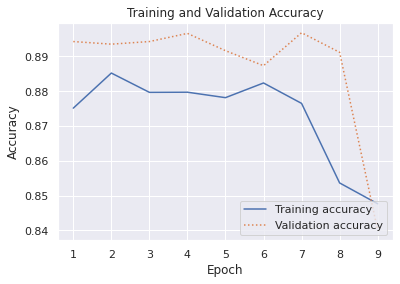

In [ ]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.18, 0.5, 'Actual label')

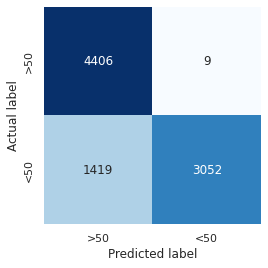

In [ ]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test)
y_predicted=y_predicted.astype(int)
mat = confusion_matrix(y_test, y_predicted)
labels = ['>50', '<50']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:

accuracy_score(y_test, np.round(abs(y_predicted)), normalize=True) 


0.8392977717758271